In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
_URL = "https://storage.googleapis.com/mledu-dataset/cats_and_dogs_filtered.zip"

In [3]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=_URL,extract=True)

In [4]:
zip_dir_base = os.path.dirname(zip_dir)

In [12]:
zip_dir_base
!find $zip_dir_base -type d -print

FIND: Parameter format not correct


In [13]:
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')

In [14]:
base_dir

'C:\\Users\\ASUS\\.keras\\datasets\\cats_and_dogs_filtered'

In [15]:
train_dir  = os.path.join(base_dir,'train')

In [16]:
train_dir

'C:\\Users\\ASUS\\.keras\\datasets\\cats_and_dogs_filtered\\train'

In [17]:
validation_dir = os.path.join(base_dir,'validation')

In [18]:
validation_dir

'C:\\Users\\ASUS\\.keras\\datasets\\cats_and_dogs_filtered\\validation'

In [19]:
train_cats_dir = os.path.join(train_dir,'cats')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
train_dogs_dir = os.path.join(train_dir,'dogs')

In [20]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
total_train = num_cats_tr+num_dogs_tr
total_val = num_cats_val+num_dogs_val
print('total training cats images: ',num_cats_tr)
print('total training dogs images: ',num_dogs_tr)
print('total validation cats images: ',num_cats_val)
print('total validation dogs images:  ',num_dogs_val)
print('Total training Images: ',total_train)
print('Total Validation Images: ',total_val)

total training cats images:  1000
total training dogs images:  1000
total validation cats images:  500
total validation dogs images:   500
Total training Images:  2000
Total Validation Images:  1000


In [21]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [22]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [23]:
train_data_gen = train_image_generator.flow_from_directory(
batch_size=BATCH_SIZE,
directory=train_dir,
shuffle=True,
target_size=(IMG_SHAPE,IMG_SHAPE),
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [24]:
validation_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                shuffle=False,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [25]:
sample_training_images,_ = next(train_data_gen)

In [26]:
sample_training_images,_ = next(train_data_gen)

In [27]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

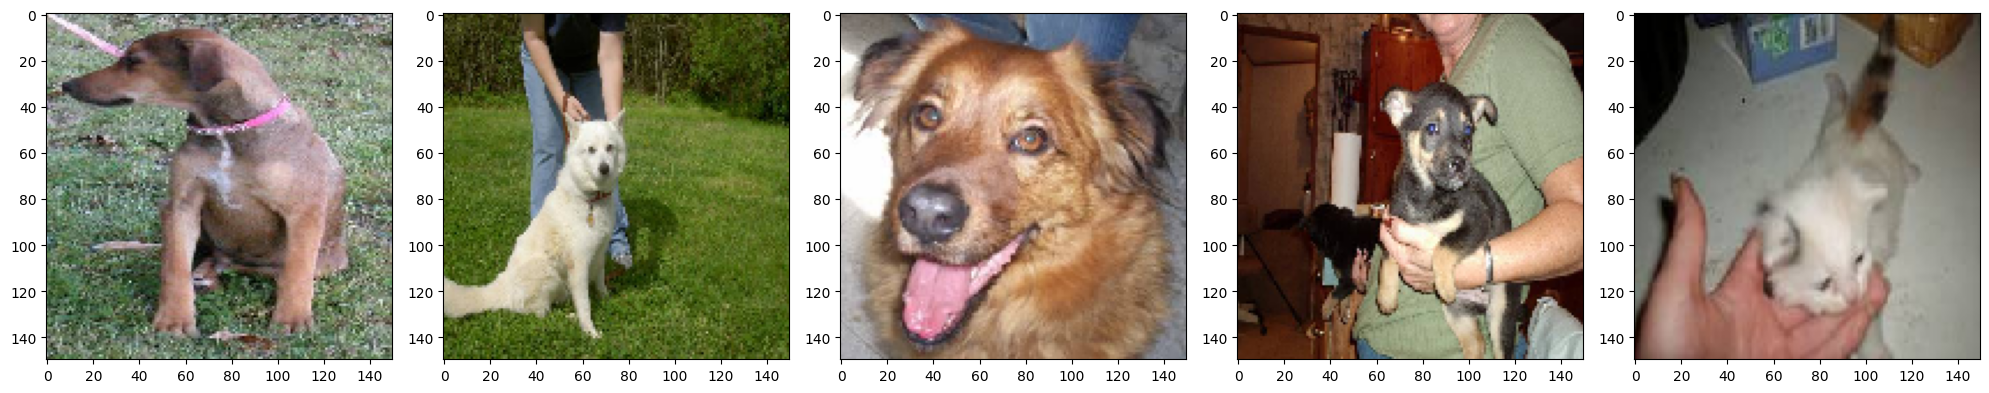

In [28]:
plotImages(sample_training_images[0:5])

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [31]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
EPOCHS = 10
history = model.fit(train_data_gen,steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),epochs=EPOCHS,
                   validation_data=validation_data_gen,
                   validation_steps=int(np.ceil(total_val/float(BATCH_SIZE))))

Epoch 1/10
20/20 [==============================] - 61s 3s/step - loss: 0.7116 - accuracy: 0.5090 - val_loss: 0.7104 - val_accuracy: 0.0844
Epoch 2/10
20/20 [==============================] - 50s 2s/step - loss: 0.6894 - accuracy: 0.5315 - val_loss: 0.6307 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 49s 2s/step - loss: 0.6651 - accuracy: 0.6030 - val_loss: 0.3458 - val_accuracy: 0.9812
Epoch 4/10
20/20 [==============================] - 50s 2s/step - loss: 0.6535 - accuracy: 0.6090 - val_loss: 0.7558 - val_accuracy: 0.5250
Epoch 5/10
20/20 [==============================] - 50s 2s/step - loss: 0.5999 - accuracy: 0.6820 - val_loss: 0.3764 - val_accuracy: 0.9406
Epoch 6/10
20/20 [==============================] - 50s 2s/step - loss: 0.5958 - accuracy: 0.6795 - val_loss: 0.4790 - val_accuracy: 0.8438
Epoch 7/10
20/20 [==============================] - 50s 2s/step - loss: 0.5418 - accuracy: 0.7120 - val_loss: 0.3431 - val_accuracy: 0.9094
Epoch 8/10
20/20 [==

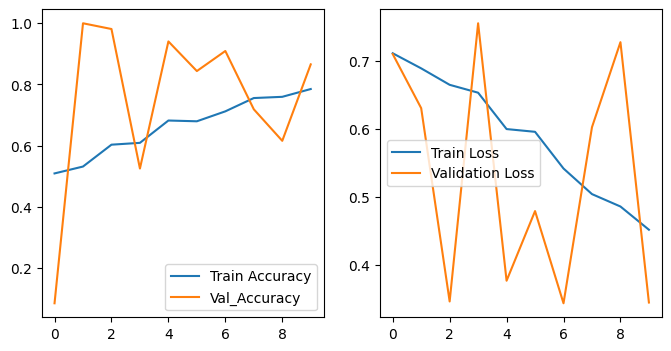

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Train Accuracy')
plt.plot(epochs_range,val_acc,label='Val_Accuracy')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Train Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc=0)
plt.show()

In [34]:
#Augmentation

In [35]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [36]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_SHAPE,IMG_SHAPE),class_mode='binary')

Found 2000 images belonging to 2 classes.


In [37]:
augmented_image = [train_data_gen[0][0][0] for i in range(5)]

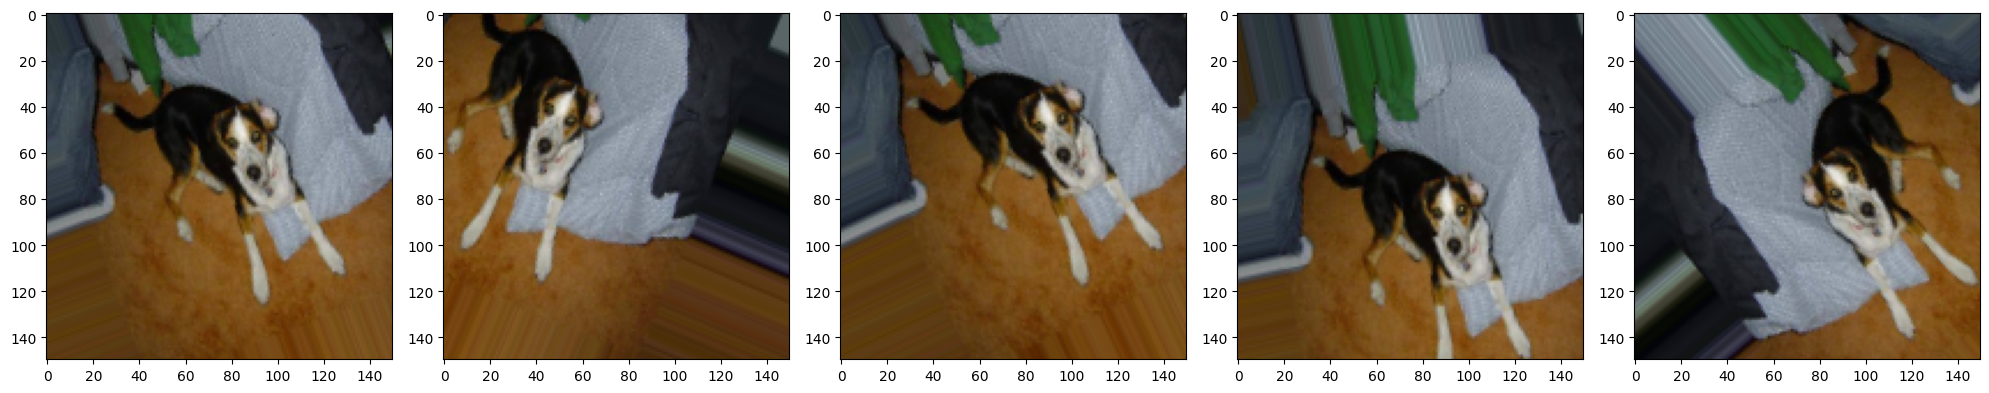

In [38]:
plotImages(augmented_image)


In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [41]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
EPOCHS = 10
history = model.fit(train_data_gen,steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),epochs=EPOCHS,
                   validation_data=validation_data_gen,
                   validation_steps=int(np.ceil(total_val/float(BATCH_SIZE))))

Epoch 1/10
20/20 [==============================] - 54s 3s/step - loss: 0.7844 - accuracy: 0.5085 - val_loss: 0.7229 - val_accuracy: 0.0250
Epoch 2/10
20/20 [==============================] - 53s 3s/step - loss: 0.6899 - accuracy: 0.5180 - val_loss: 0.7880 - val_accuracy: 0.0938
Epoch 3/10
20/20 [==============================] - 53s 3s/step - loss: 0.6811 - accuracy: 0.5425 - val_loss: 0.7093 - val_accuracy: 0.5750
Epoch 4/10
20/20 [==============================] - 53s 3s/step - loss: 0.6640 - accuracy: 0.6055 - val_loss: 0.7040 - val_accuracy: 0.5344
Epoch 5/10
20/20 [==============================] - 53s 3s/step - loss: 0.6734 - accuracy: 0.5720 - val_loss: 0.5656 - val_accuracy: 0.9563
Epoch 6/10
20/20 [==============================] - 53s 3s/step - loss: 0.6599 - accuracy: 0.5960 - val_loss: 0.8862 - val_accuracy: 0.3063
Epoch 7/10
20/20 [==============================] - 53s 3s/step - loss: 0.6516 - accuracy: 0.6210 - val_loss: 0.8143 - val_accuracy: 0.4062
Epoch 8/10
20/20 [==

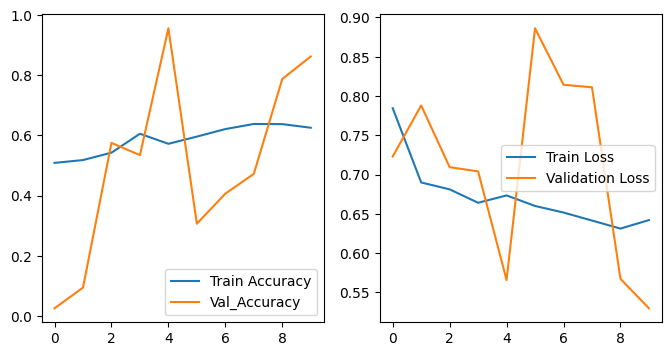

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Train Accuracy')
plt.plot(epochs_range,val_acc,label='Val_Accuracy')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Train Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc=0)
plt.show()